# Partie visualisation des données

In [6]:
# Une fois le jeu de données traité, il est intéressant de visualiser les données que nous avons.  

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import random
import numpy as np

import seaborn as sns

from IPython.display import Markdown, display

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

#sklearn modules for Model Evaluation & Improvement:
    
    

from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataset = pd.read_csv('datasheetNoNan.csv',  index_col=0)
dataset.head()

genre  espace_client_web assurance_vie banque_principale  \
id_client                                                            
0             F                0.0           oui               non   
1             H                0.0           non               non   
2             H                0.0           non               non   
3             H                0.0           non               non   
4             F                0.0           non               non   

           anciennete_mois compte_epargne credit_autres cartes_bancaires  \
id_client                                                                  
0                      1.0            non          bail            basic   
1                     34.0            oui     permanent            basic   
2                      2.0            oui     permanent            basic   
3                     45.0            non          bail            basic   
4                      2.0            oui     permanent           medium   

          compte_courant compte_joint  ...        var_31        var_32  \
id_client                              ...                               
0                    non          oui  ...  13216.762683  13859.206348   
1                    oui          non  ...   8449.275069  15565.521380   
2                    oui      inconnu  ...  16206.280478  19034.429135   
3                    oui          non  ...  12451.917950  17632.635995   
4                    non          non  ...  11527.410647   9523.672653   

                 var_33        var_34        var_35        var_36  \
id_client                                                           
0          14679.466563  13231.780818   9072.502501  14730.850501   
1          13227.847825  19622.902605  16384.195278  19191.523166   
2          23235.482709  22215.732325  24669.049563  26697.532271   
3          15620.487281  20787.992352  17710.886386  20745.284745   
4           8535.781042  13901.204569  13607.338517  15628.137128   

                 var_37        var_38     branche  churn  
id_client                                                 
0          12920.861540  18742.551182      CENTRE    non  
1          19569.901065  27659.692989  NORD-OUEST    non  
2          32391.470014  26714.148725   SUD-OUEST    oui  
3          22273.316999  22871.768205     SUD-EST    non  
4          17286.251614  18611.461589   SUD-OUEST    oui  

[5 rows x 62 columns]

In [3]:
import plotly.express as px

# Use column names instead. This is the same chart as above.
fig = px.scatter(dataset, x='anciennete_mois', y='interet_compte_epargne_total', color='banque_principale')
fig.show()

On remarque 2 choses le passage par la moyenne créer du bruit il faut donc penser à un autre modèle pour estimer les valeurs inconnues

A partir des moyennes des 2 variables et de l'origine il est préférable de placer ces points sur une droite linéaire passant par ces deux points

Passer par une droite créer aussi du bruit et laisse échapper 3 valeurs

In [4]:
# Use column names instead. This is the same chart as above.
fig = px.scatter(dataset, x='interet_compte_epargne_total', y='agios_6mois', color='banque_principale')
fig.show()

In [31]:
genre = branche = dataset.groupby(['genre']).size().reset_index(name='Counts')

fig = px.bar(genre, x="genre",y="Counts", title="Clients repartition")
fig.show()

In [5]:
# calculate department count
branche = dataset.groupby(['branche', 'churn']).size().reset_index(name='Counts')

# plot bar chart
fig = px.bar(branche, x="branche", y="Counts", color="churn", title="Clients repartition")
fig.show()

In [40]:
# calculate department count
carte = dataset.groupby(['cartes_bancaires', 'churn']).size().reset_index(name='Counts')

# plot bar chart
fig = px.bar(carte, x="cartes_bancaires", y="Counts", color="churn", title="Clients repartition")
fig.show()

In [6]:
# calculate department count
age = dataset.groupby(['age', 'churn']).size().reset_index(name='Counts')

# plot bar chart
fig = px.line(age, x="age", y="Counts", color='churn')
fig.show()

In [7]:
# On remarque ici, que logiquement, plus les clients

In [8]:
# calculate department count
anciennete = dataset.groupby(['anciennete_mois', 'churn']).size().reset_index(name='Counts')

# plot bar chart
fig = px.line(anciennete, x="anciennete_mois", y="Counts", color='churn')
fig.show()

In [9]:
# calculate department count
banque = dataset.groupby(['banque_principale', 'churn']).size().reset_index(name='Counts')

# plot bar chart
fig = px.bar(banque, x="banque_principale", y="Counts", color="churn", title="Clients repartition")
fig.show()

Deux choses à noter sur ce graphe, 
    
    le dataset contient plus d'individus n'ayant pas cette banque comme banque principale que l'inverse. 
    
    le taux de churn pour les clients pour qui ce n'est pas la banque principale est supérieure ce qui parait tout à fait logique. 

In [38]:
# calculate department count
interet = dataset.groupby(['interet_compte_epargne_total', 'churn']).size().reset_index(name='Counts')
# plot bar chart
fig = px.line(interet, x="interet_compte_epargne_total", y="Counts", color="churn", title="Clients repartition")
fig.show()

In [39]:
# calculate department count
type_ = dataset.groupby(['type', 'churn']).size().reset_index(name='Counts')

# plot bar chart
fig = px.bar(type_, x="type", y="Counts", color="churn", title="Clients repartition")
fig.show()

In [10]:
# calculate department count
contact = dataset.groupby(['methode_contact', 'churn']).size().reset_index(name='Counts')

# plot bar chart
fig = px.bar(contact, x="methode_contact", y="Counts", color="churn", title="Clients repartition")
fig.show()

Il est interessant que le mail, n'est pas le mode le plus favorable

In [11]:
# calculate department count
segment = dataset.groupby(['segment_client', 'churn']).size().reset_index(name='Counts')

# plot bar chart
fig = px.bar(segment, x="segment_client", y="Counts", color="churn", title="Clients repartition")
fig.show()

In [12]:
# calculate assurance count
assurance = dataset.groupby(['assurance_habitation', 'churn']).size().reset_index(name='Counts')

# plot bar chart
fig = px.bar(assurance, x="assurance_habitation", y="Counts", color="churn", title="Clients repartition")
fig.show()

In [14]:
# calculate assurance count
PEA = dataset.groupby(['compte_epargne', 'churn']).size().reset_index(name='Counts')

# plot bar chart
fig = px.bar(PEA, x="compte_epargne", y="Counts", color="churn", title="Clients repartition")
fig.show()

In [15]:
# calculate assurance count
courant = dataset.groupby(['compte_courant', 'churn']).size().reset_index(name='Counts')

# plot bar chart
fig = px.bar(courant, x="compte_courant", y="Counts", color="churn", title="Clients repartition")
fig.show()

In [17]:
# calculate assurance count
joint = dataset.groupby(['compte_joint', 'churn']).size().reset_index(name='Counts')

# plot bar chart
fig = px.bar(joint, x="compte_joint", y="Counts", color="churn", title="Clients repartition")
fig.show()

In [18]:
# calculate assurance count
immo = dataset.groupby(['credit_immo', 'churn']).size().reset_index(name='Counts')

# plot bar chart
fig = px.bar(immo, x="credit_immo", y="Counts", color="churn", title="Clients repartition")
fig.show()

In [26]:
dataset_clean = pd.read_csv('CleanDatasheet.csv',  index_col=0)
dataset_clean.head()

genre  espace_client_web  assurance_vie  banque_principale  \
id_client                                                               
0              0                0.0              0                  1   
1              1                0.0              1                  1   
2              1                0.0              1                  1   
3              1                0.0              1                  1   
4              0                0.0              1                  1   

           anciennete_mois  compte_epargne  credit_autres  cartes_bancaires  \
id_client                                                                     
0                      1.0               1              2                 1   
1                     34.0               0              0                 1   
2                      2.0               0              0                 1   
3                     45.0               1              2                 1   
4                      2.0               0              0                 0   

           compte_courant  compte_joint  ...  segment_client_C4  \
id_client                                ...                      
0                       1             0  ...                  1   
1                       0             1  ...                  0   
2                       0            -1  ...                  0   
3                       0             1  ...                  0   
4                       1             1  ...                  0   

           segment_client_D1  segment_client_D2  segment_client_D3  \
id_client                                                            
0                          0                  0                  0   
1                          0                  0                  0   
2                          0                  0                  0   
3                          0                  0                  0   
4                          0                  0                  1   

           branche_CENTRE  branche_NORD-EST  branche_NORD-OUEST  \
id_client                                                         
0                       1                 0                   0   
1                       0                 0                   1   
2                       0                 0                   0   
3                       0                 0                   0   
4                       0                 0                   0   

           branche_OUTRE-MER  branche_SUD-EST  branche_SUD-OUEST  
id_client                                                         
0                          0                0                  0  
1                          0                0                  0  
2                          0                0                  1  
3                          0                1                  0  
4                          0                0                  1  

[5 rows x 81 columns]

<AxesSubplot:>

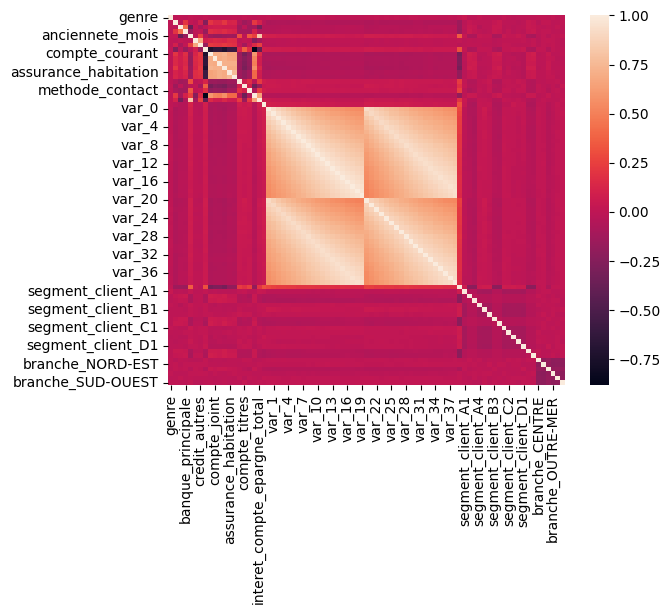

In [28]:
corr = dataset_clean.corr()

sns.heatmap(corr)